# Module 4: Understading AUC, ROC, Confusion matrix and distribution graphs

## Generate some synthetic data

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 5, Finished, Available, Finished)

### Split the data into train and test

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 6, Finished, Available, Finished)

## Train the model (logistic regression) and get probabilities and predict classes

In [5]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities and predicted classes
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1
y_pred = model.predict(X_test)


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 7, Finished, Available, Finished)

2024-10-02:15:11:45,880 WARNING  [tracking_store.py:153] log_inputs not supported


2024-10-02:15:11:51,193 WARNING  [tracking_store.py:153] log_inputs not supported
2024-10-02:15:11:51,216 WARNING  [tracking_store.py:153] log_inputs not supported


In [6]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 8, Finished, Available, Finished)

Confusion Matrix:
 [[127  18]
 [ 27 128]]


## Plot the curve

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 9, Finished, Available, Finished)

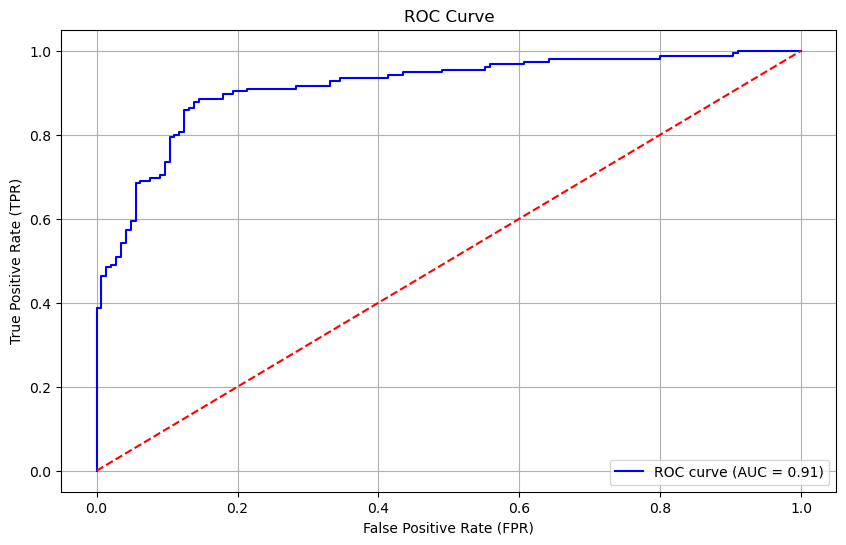

In [7]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Plot the distributions for predicted probabilities and actual labels

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 10, Finished, Available, Finished)

/tmp/ipykernel_5813/483273453.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y_test'] == 0]['y_pred_proba'], label="Class 0 (actual)", shade=True, color="blue")
/tmp/ipykernel_5813/483273453.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y_test'] == 1]['y_pred_proba'], label="Class 1 (actual)", shade=True, color="orange")


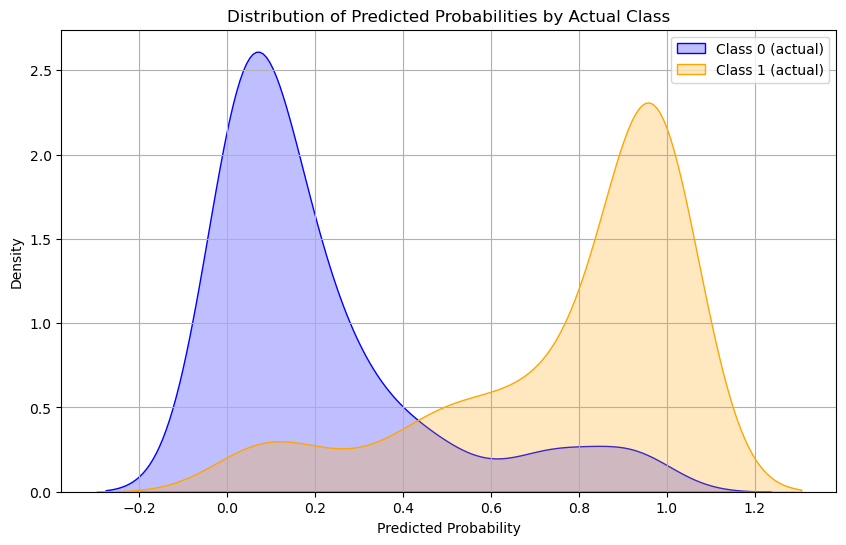

In [8]:
# Plot distributions of predicted probabilities for the two classes
plt.figure(figsize=(10, 6))

# Create a dataframe for plotting
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred_proba': y_pred_proba
})

# Plot the distribution for actual class 0
sns.kdeplot(df[df['y_test'] == 0]['y_pred_proba'], label="Class 0 (actual)", shade=True, color="blue")

# Plot the distribution for actual class 1
sns.kdeplot(df[df['y_test'] == 1]['y_pred_proba'], label="Class 1 (actual)", shade=True, color="orange")

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.legend()
plt.grid(True)
plt.show()


## Highlight a point on the ROC Curve

In [11]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix_stats(y_true, y_pred_proba, threshold):
    # Apply the threshold to convert predicted probabilities to class labels
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_threshold).ravel()
    
    return tp, fn, fp, tn


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 13, Finished, Available, Finished)

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 14, Finished, Available, Finished)

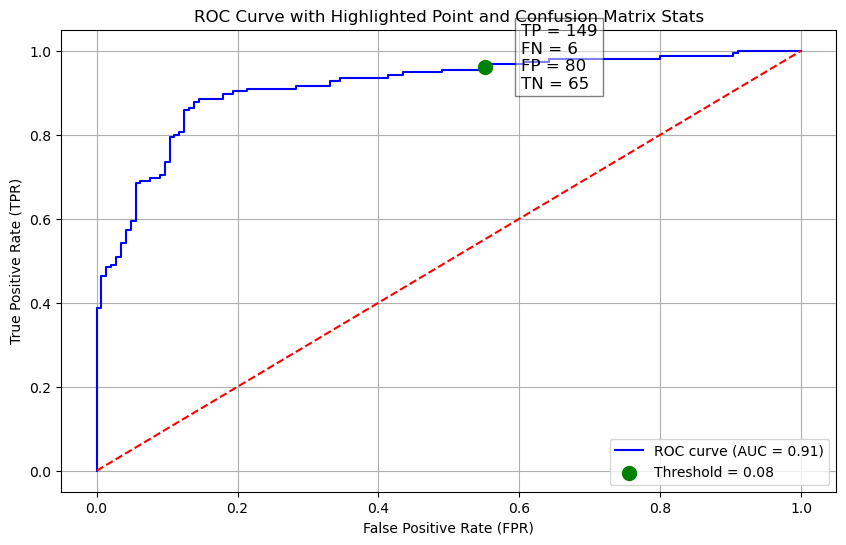

In [12]:
# Choose a threshold index from the ROC curve to highlight
chosen_threshold_idx = 60  # You can choose any index between 0 and len(thresholds)-1
chosen_threshold = thresholds[chosen_threshold_idx]

# Get TP, FN, FP, TN for the selected threshold
tp, fn, fp, tn = get_confusion_matrix_stats(y_test, y_pred_proba, chosen_threshold)

# Plot the ROC curve with the highlighted point
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Highlight the selected point on the ROC curve
plt.scatter(fpr[chosen_threshold_idx], tpr[chosen_threshold_idx], color='green', s=100, zorder=5, label=f'Threshold = {chosen_threshold:.2f}')

# Add text showing TP, FN, FP, TN at the selected threshold
plt.text(fpr[chosen_threshold_idx] + 0.05, tpr[chosen_threshold_idx] - 0.05,
         f"TP = {tp}\nFN = {fn}\nFP = {fp}\nTN = {tn}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Highlighted Point and Confusion Matrix Stats')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 15, Finished, Available, Finished)

/tmp/ipykernel_5813/3648271192.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y_test'] == 0]['y_pred_proba'], label="Class 0 (actual)", shade=True, color="blue")
/tmp/ipykernel_5813/3648271192.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y_test'] == 1]['y_pred_proba'], label="Class 1 (actual)", shade=True, color="orange")


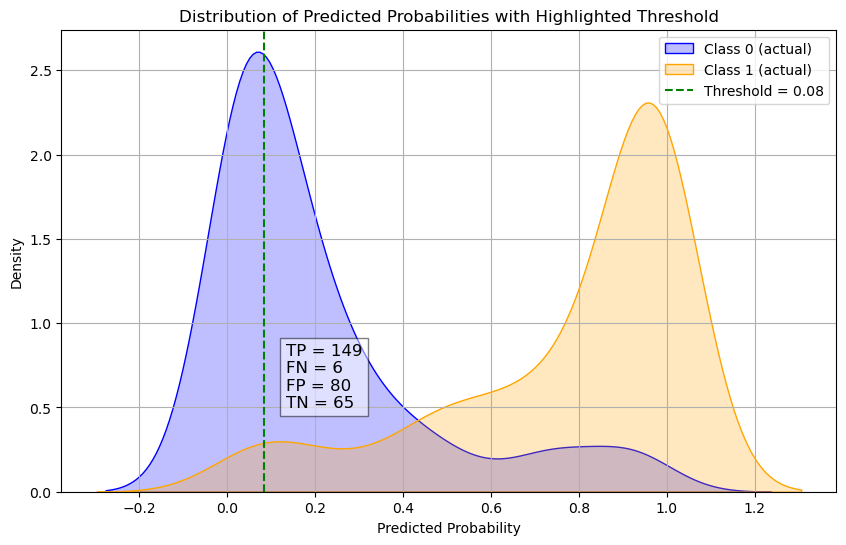

In [13]:
# Now, let's mark the threshold on the distribution plot and display confusion matrix stats
plt.figure(figsize=(10, 6))

# Plot the distributions of predicted probabilities for both classes
sns.kdeplot(df[df['y_test'] == 0]['y_pred_proba'], label="Class 0 (actual)", shade=True, color="blue")
sns.kdeplot(df[df['y_test'] == 1]['y_pred_proba'], label="Class 1 (actual)", shade=True, color="orange")

# Highlight the chosen threshold on the x-axis
plt.axvline(chosen_threshold, color='green', linestyle='--', label=f'Threshold = {chosen_threshold:.2f}')

# Add text showing TP, FN, FP, TN at the selected threshold
plt.text(chosen_threshold + 0.05, 0.5,
         f"TP = {tp}\nFN = {fn}\nFP = {fp}\nTN = {tn}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities with Highlighted Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Confusion Matrix

In [14]:
# Import necessary library to display the results in tabular form
import pandas as pd

# Create a list to store the confusion matrix statistics for each threshold
confusion_stats = []

# Loop over each threshold and calculate TP, FN, FP, TN
for idx, threshold in enumerate(thresholds):
    tp, fn, fp, tn = get_confusion_matrix_stats(y_test, y_pred_proba, threshold)
    confusion_stats.append({
        'Threshold': threshold,
        'True Positive (TP)': tp,
        'False Negative (FN)': fn,
        'False Positive (FP)': fp,
        'True Negative (TN)': tn
    })

# Convert the results into a pandas DataFrame
confusion_df = pd.DataFrame(confusion_stats)

# Display the table
confusion_df.head()  # Display the first few rows of the table


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 16, Finished, Available, Finished)

,Threshold,True Positive (TP),False Negative (FN),False Positive (FP),True Negative (TN)
0,inf,0,155,0,145
1,0.999903,1,154,0,145
2,0.960841,60,95,0,145
3,0.960680,60,95,1,144
4,0.942950,72,83,1,144


In [15]:
confusion_df

StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 17, Finished, Available, Finished)

,Threshold,True Positive (TP),False Negative (FN),False Positive (FP),True Negative (TN)
0,inf,0,155,0,145
1,0.999903,1,154,0,145
2,0.960841,60,95,0,145
3,0.960680,60,95,1,144
4,0.942950,72,83,1,144
...,...,...,...,...,...
69,0.011821,153,2,131,14
70,0.011405,154,1,131,14
71,0.010018,154,1,132,13
72,0.009132,155,0,132,13


In [16]:
# Display the entire confusion matrix statistics table
pd.set_option('display.max_rows', None) 
print(confusion_df)

# Alternatively, you can save the table to a CSV file
confusion_df.to_csv('confusion_matrix_stats.csv', index=False)


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 18, Finished, Available, Finished)

    Threshold  True Positive (TP)  False Negative (FN)  False Positive (FP)  \
0         inf                   0                  155                    0   
1    0.999903                   1                  154                    0   
2    0.960841                  60                   95                    0   
3    0.960680                  60                   95                    1   
4    0.942950                  72                   83                    1   
5    0.937637                  72                   83                    2   
6    0.935846                  75                   80                    2   
7    0.935257                  75                   80                    3   
8    0.933417                  76                   79                    3   
9    0.931616                  76                   79                    4   
10   0.919880                  79                   76                    4   
11   0.918374                  79                   

In [17]:
def print_confusion_matrix(threshold_idx):
    threshold = thresholds[threshold_idx]
    tp, fn, fp, tn = get_confusion_matrix_stats(y_test, y_pred_proba, threshold)
    
    print(f"Confusion Matrix for Threshold = {threshold:.2f}:\n")
    print(f"                  Predicted Positive    Predicted Negative")
    print(f"Actual Positive        {tp}                    {fn}")
    print(f"Actual Negative        {fp}                    {tn}")

# Display confusion matrix for a specific threshold index (e.g., 30)
print_confusion_matrix(60)


StatementMeta(, 41b85e38-0959-45e3-b7bb-7f6846ae8b0a, 19, Finished, Available, Finished)

Confusion Matrix for Threshold = 0.08:

                  Predicted Positive    Predicted Negative
Actual Positive        149                    6
Actual Negative        80                    65
